In [1]:
# utilities
import re
import numpy as np
import pandas as pd

#Load the dataset

In [56]:
df = pd.read_csv("/content/drive/MyDrive/ADS-1/1800's data/parliament_articles_1928.csv", low_memory = True, delimiter = ';')

#Exploratory Data Analysis

In [60]:
df.head(20)

,ID,Title,Url,Date,Text
0,1,THE KING'S SPEECH.,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,"The KING being seated on the Throne, and the C..."
1,2,LIST OF THE LORDS TEMPORAL.,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,"GARTER KING OF ARMS attending, delivered at th..."
2,3,BUSINESS OF THE HOUSE.,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,THE LORD PRIVY SEAL (THE MARQUESS OF SALISBURY...
3,4,SELECT VESTRIES.,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,"Bill, pro forma, read 1a."
4,5,ADDRESS IN REPLY TO HIS MAJESTY'S MOST GRACIOU...,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,The King's Speech reported by the LORD CHANCEL...
5,6,INDIAN STATUTORY COMMISSION.,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,"LORD OLIVIER My Lords, I wish to put a questio..."
6,7,CHAIRMAN OF COMMITTEES.,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,The VISCOUNT HUTCHINSON (E. Donoughmore) appoi...
7,8,Preamble,https://api.parliament.uk/historic-hansard/lor...,07 February 1928,The Lord de Clifford—Sat first in Parliament a...
8,9,"AMESBURY ELECTRICITY ORDER, 1928.",https://api.parliament.uk/historic-hansard/lor...,07 February 1928,Special Order in respect of the parish of Ames...
9,10,"BASINGSTOKE ELECTRICITY (EXTENSION) ORDER, 1927.",https://api.parliament.uk/historic-hansard/lor...,07 February 1928,Special Order in respect of parts of the rural...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48751 entries, 0 to 48750
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      48751 non-null  int64 
 1   Title   48751 non-null  object
 2   Url     48751 non-null  object
 3   Date    48751 non-null  object
 4   Text    41670 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


Checking if the dataset has any null values

In [28]:
np.sum(df.isnull().any(axis=1))

12

Checking if the Text column has null values

In [29]:
df['Text'].isnull().values.any()

True

All the missing values are from the TEXT column

In [30]:
df['Text'].isnull().sum()

12

In [31]:
df.shape

(4364, 5)

In [62]:
df['Text'] = df['Text'].str.lower()

In [63]:
df['Text']

0        the king being seated on the throne, and the c...
1        garter king of arms attending, delivered at th...
2        the lord privy seal (the marquess of salisbury...
3                                bill, pro forma, read 1a.
4        the king's speech reported by the lord chancel...
                               ...                        
48746    mr. rennie smithasked the secretary of state f...
48747    mr. duckworthasked the secretary of state for ...
48748                                                  NaN
48749    captain foxcroftasked the secretary of state f...
48750    colonel wedgwoodasked the secretary of state f...
Name: Text, Length: 48751, dtype: object

Replacing the Null values with 'No TEXT Available'


In [64]:
df['Text'].fillna("No Text Available", inplace = True)

After replacing the Null values checking if there are any Null Values

In [65]:
df['Text'].isnull().values.any()

False

Checking if the dataset has any null values

Cleaning and Removing Punctuation Marks

In [66]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['Text']= df['Text'].apply(lambda x: cleaning_punctuations(x))
df['Text'].tail()

48746    mr rennie smithasked the secretary of state fo...
48747    mr duckworthasked the secretary of state for f...
48748                                    No Text Available
48749    captain foxcroftasked the secretary of state f...
48750    colonel wedgwoodasked the secretary of state f...
Name: Text, dtype: object

Defining some un-necessary words

The code is importing the sent_tokenize and word_tokenize functions from the nltk.tokenize module. These functions are used to split a text into sentences or words, respectively. This can be useful for tasks such as text preprocessing and natural language processing.

The code is also importing the stopwords corpus from the nltk.corpus module. This corpus contains a list of common English words that are often considered irrelevant or uninformative, such as "the", "a", "and", etc. The stopwords corpus can be used to filter out these words from a text, which can improve the performance of certain natural language processing tasks.

In [67]:
# Import the sent_tokenize and word_tokenize functions from the nltk.tokenize module
from nltk.tokenize import sent_tokenize, word_tokenize

# Import the stopwords corpus from the nltk.corpus module
from nltk.corpus import stopwords

In this code, the Natural Language Toolkit (nltk) library is imported and the list of English stopwords is downloaded. The stopwords are then stored in a set, which is a data structure that allows for fast membership testing and set operations. Finally, the set of stopwords is printed to the screen.

Stopwords are common words that are often removed from text data before further processing. These words are generally considered to be uninformative or irrelevant for many natural language processing tasks, such as text classification or information retrieval. By removing stopwords, the remaining words in the text can be more easily analyzed and understood by natural language processing algorithms.

In [69]:
# import the Natural Language Toolkit (nltk) library
import nltk 
# download the list of stopwords from nltk
nltk.download('stopwords') 
# create a set of English stopwords
stops = set(stopwords.words('english')) 
# print the set of stopwords
print(stops) 

{'he', 'again', 'are', 'don', 'they', 'our', 'now', 'once', 'o', "isn't", 't', 'no', "wouldn't", "that'll", 'until', "aren't", 'couldn', 'just', 'from', 'where', 'its', 'these', "doesn't", 'doing', 'up', 'him', "haven't", 'mightn', 'above', 'those', 'out', 'herself', 'myself', 'both', 'll', 'through', 'theirs', 'i', 'she', 'mustn', "mustn't", 'off', 'down', 'at', 'ours', 'can', 'not', 'shan', 'own', 'than', "you've", 'below', 'ma', 'them', 'your', 'of', 'any', 'some', "wasn't", 'here', "shouldn't", "didn't", "hasn't", 'isn', 'their', 'who', 'more', 'themselves', 'or', 'what', 'when', 'as', 'me', 'before', 'there', 'having', 'to', "won't", 'each', 'few', 'after', 'being', 'm', "you'll", 'wasn', 'further', 'only', 'the', "you'd", 'how', 'did', 'wouldn', 'it', 'will', 'nor', 'we', 'on', 'hasn', 'yours', 'hadn', 'a', 'then', 'this', 'does', 'by', 'between', 'against', 'during', 'and', 'were', 'should', 'you', "couldn't", 'so', 'himself', "mightn't", 'if', 'whom', 'won', 'ain', 's', 'haven'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
#Storing the set of stop words in STOPWORDS variable
STOPWORDS = set(stops)
#define a function named "cleaning_stopwords" that takes in a text as input
def cleaning_stopwords(text):
  # split the text into words, remove stopwords, and join the words back into a string
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# apply the "cleaning_stopwords" function to the "Text" column of the dataframe
df['Text'] = df['Text'].apply(lambda text: cleaning_stopwords(text))
# display the first few rows of the cleaned "Text" column
df['Text'].head()

0    king seated throne commons bar speaker majesty...
1    garter king arms attending delivered table usu...
2    lord privy seal marquess salisbury lords may c...
3                               bill pro forma read 1a
4    kings speech reported lord chancellorthe duke ...
Name: Text, dtype: object

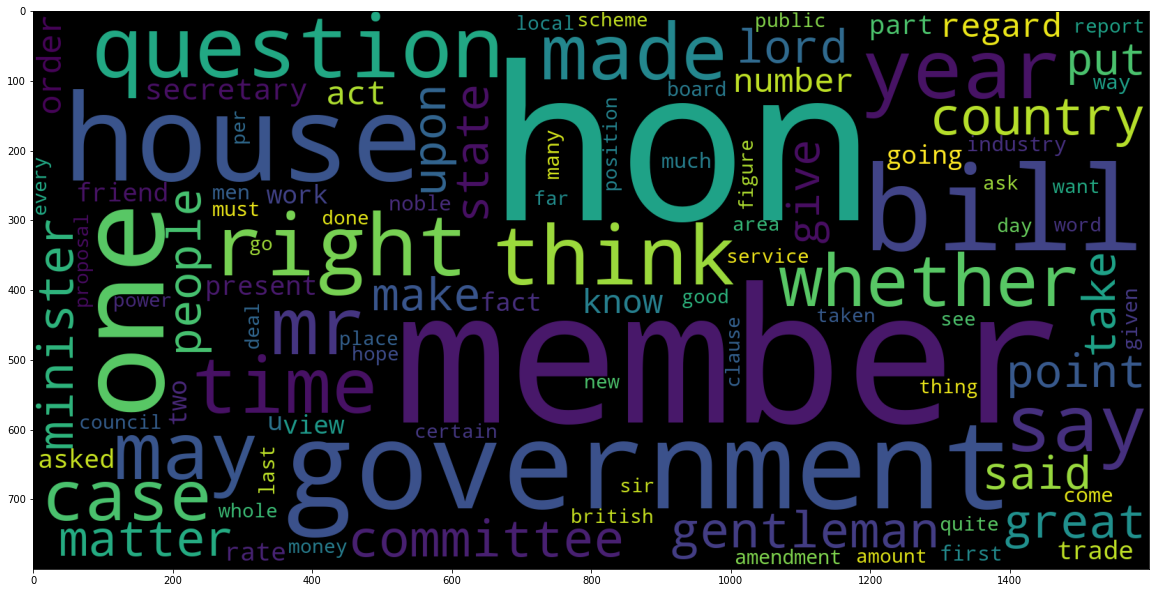

In [71]:
# import seaborn library and alias it as sns
import seaborn as sns
# import the WordCloud class from the wordcloud module
from wordcloud import WordCloud
# import matplotlib's pyplot module and alias it as plt
import matplotlib.pyplot as plt
# retrieve the text data from the "Text" column of the dataframe and store it in a variable named "data"
data = df['Text']
# set the figure size to (20, 20)
plt.figure(figsize = (20,20))
# initialize a WordCloud object with the specified parameters and generate word cloud with the words present in the data 
#You can change the max_words to any number of words
wc = WordCloud(max_words = 100 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
# display the word cloud               
plt.imshow(wc)